# Project
## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:

**Based on the Fandango article (link below), let's determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**


## Understanding the Background and Data


**Article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

### The Data

Data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

# 



## Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings

----

**Import libraries**

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv('fandango_scrape.csv')

In [92]:
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [94]:
df.describe()#.transpose()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Exploring the relationship between popularity of a film and its rating; using a scatterplot to show the relationship between rating and votes.**

In [95]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES'], dtype='object')

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

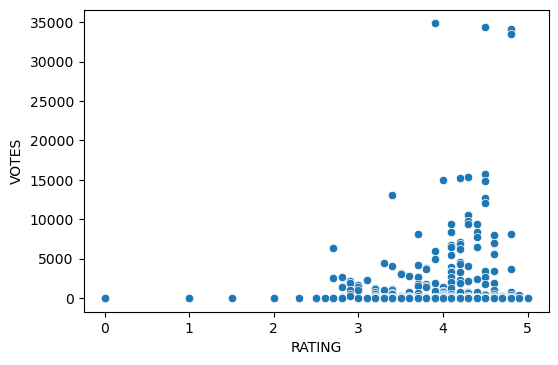

In [96]:
plt.figure(dpi=100)
sns.scatterplot(data=df,y='VOTES',x='RATING')

**Checking the correlation between the columns:**

In [97]:
df.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**TASK: Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

#### More exploratory data of the dataset: films per year, best and worst movies, and their distribution in the dataset

In [98]:
df['FILM'].apply(lambda x: x[-5:-1])

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: FILM, Length: 504, dtype: object

In [99]:
# Assign striped year data to a new column 'YEAR'
df['YEAR'] = df['FILM'].apply(lambda x: x[-5:-1])

In [100]:
len(df)
df['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

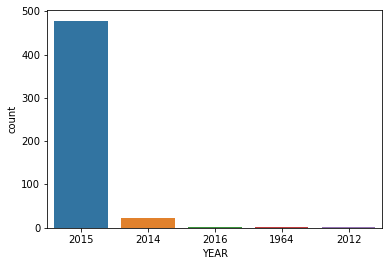

In [101]:
# Visualising count of movies per year by a countplot
sns.countplot(data=df,x='YEAR')

**TASK: What are the 10 movies with the highest number of votes?**

In [102]:
# 10 highest movies by number of votes
df.sort_values('VOTES',ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [103]:
# Check films with zero votes
len(df[df['VOTES']==0])

69

In [104]:
# Remove films with zero votes from the dataframe and assign to new dataframe
newdf = df[df['VOTES']!=0]

In [105]:
# Confirm zero votes' rows have been removed
len(df)-len(newdf)

69

In [106]:
newdf.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


# 

----

Using KDE plots to display the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). 

<AxesSubplot:xlabel='STARS', ylabel='Density'>

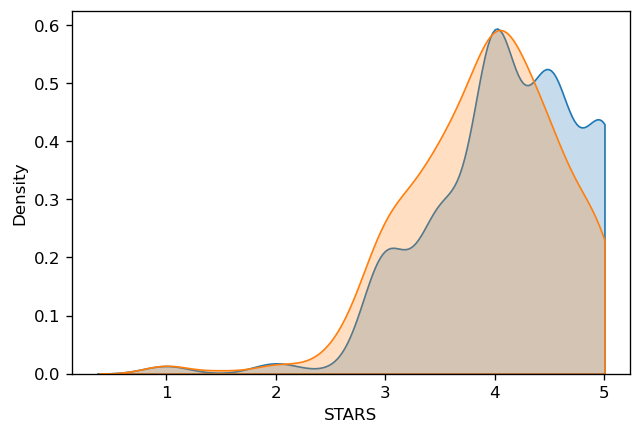

In [107]:
# KDEs clipped to 0-5 as rating will always be within this range

plt.figure(dpi=120)
sns.kdeplot(data=newdf,x='STARS',fill=True,clip=(0,5))
sns.kdeplot(data=newdf,x='RATING',fill=True,clip=(0,5))

In [108]:
# Quantify the RATING and STARS differences into a new columns
newdf['STARS_DIFF'] = round(newdf['STARS'] - newdf['RATING'],1)

C:\Users\User\AppData\Local\Temp\ipykernel_1784\1854930838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['STARS_DIFF'] = round(newdf['STARS'] - newdf['RATING'],1)


In [109]:
newdf['STARS_DIFF']

0      0.1
1      0.0
2      0.2
3      0.2
4      0.0
      ... 
430    0.0
431    0.0
432    0.0
433    0.0
434    0.0
Name: STARS_DIFF, Length: 435, dtype: float64

**TASK: Create a count plot to display the number of times a certain difference occurs:**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

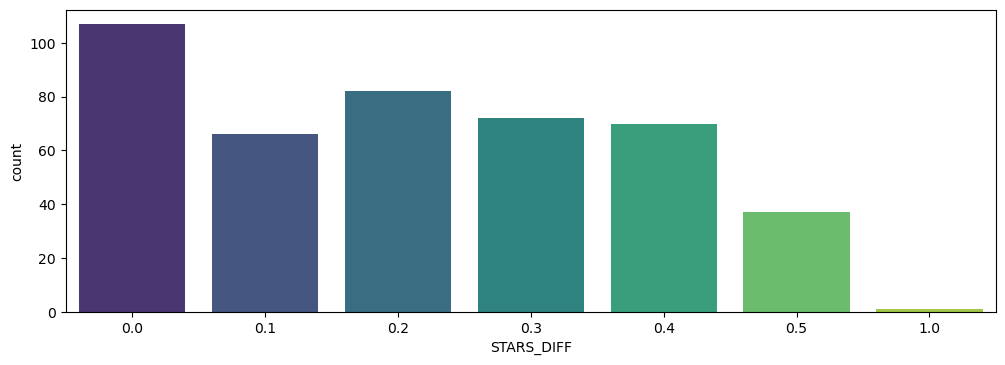

In [110]:
# Create a countplot to assess the differences
plt.figure(dpi=100,figsize=(12,4))
sns.countplot(data=newdf,x='STARS_DIFF',palette='viridis')

** We can see from the countplot that there are substantial differences between Fandango's ratings and the voters**

# 

In [111]:
# One movie which had a whole 1 star difference
newdf[newdf['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0



## Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

In [112]:
all_sites = pd.read_csv("all_sites_scores.csv")

**DataFrame analysis**

In [113]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [114]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [115]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Analysis of the Rotten Tomatoes critics reviews (ratings published by official critics) and user reviews. 

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

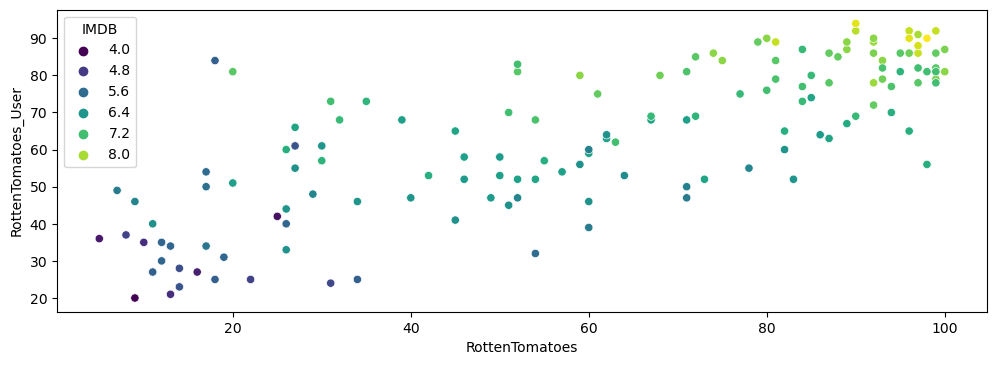

In [116]:
plt.figure(dpi=100,figsize=(12,4))
sns.scatterplot(data=all_sites,x='RottenTomatoes',y = 'RottenTomatoes_User',palette='viridis',hue="IMDB")

Quantifying difference between RT Critic and User Scores

In [117]:
# Assign difference to a new dataframe column
all_sites['RottenTomatoes-RottenTomatoes_User'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [118]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes-RottenTomatoes_User
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


# 

**Mean Absolute Difference between RT scores and RT User scores as described above.**

In [119]:
all_sites['RottenTomatoes-RottenTomatoes_User'].abs().mean()

15.095890410958905

**Plotting the distribution of the differences between RT Critics Score and RT User Score.**

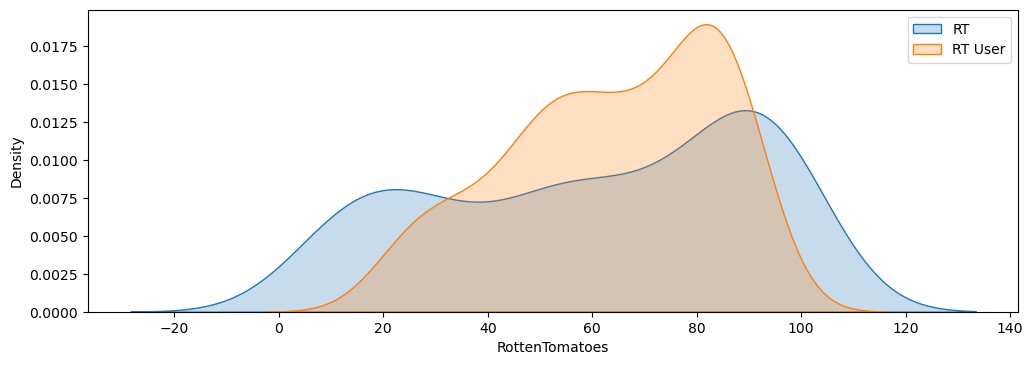

In [120]:
# KDE Distribution

plt.figure(dpi=100,figsize=(12,4))
sns.kdeplot(data=all_sites,x='RottenTomatoes',palette='viridis',fill=True,label='RT')
sns.kdeplot(data=all_sites,x= 'RottenTomatoes_User',palette='viridis',fill=True,label ='RT User')

plt.legend()

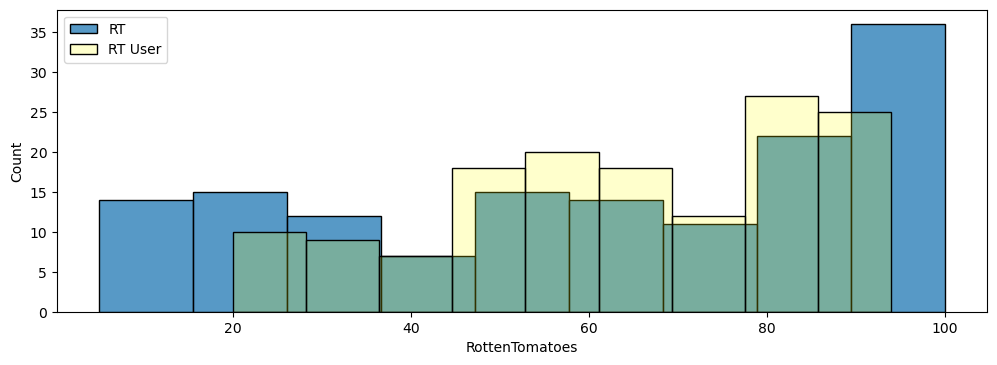

In [157]:
# Histogram Distribution

plt.figure(dpi=100,figsize=(12,4))
sns.histplot(data=all_sites,x='RottenTomatoes',palette='viridis',fill=True,label='RT')
sns.histplot(data=all_sites,x= 'RottenTomatoes_User',palette='Set2',fill=True,label ='RT User',color='yellow',alpha=0.2)

plt.legend()

<AxesSubplot:xlabel='RottenTomatoes-RottenTomatoes_User', ylabel='Count'>

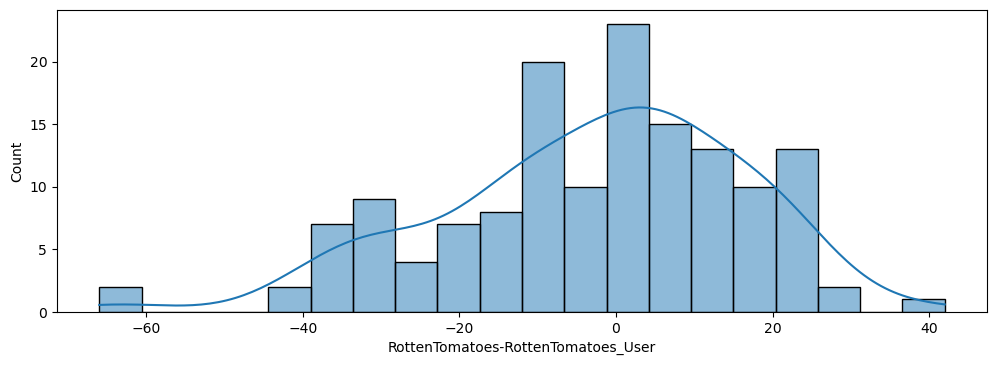

In [122]:
# Histogram Distribution with a KDE

plt.figure(dpi=100,figsize=(12,4))
sns.histplot(data=all_sites,x='RottenTomatoes-RottenTomatoes_User',palette='viridis',fill=True,kde=True,bins=20)

**We can see the distribution of their differences follows a normal distribution**

# 

**Distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

<AxesSubplot:xlabel='RottenTomatoes-RottenTomatoes_User', ylabel='Count'>

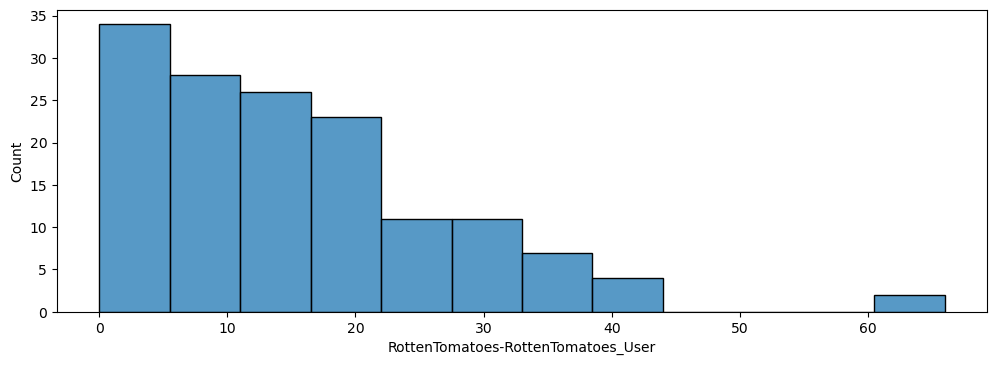

In [123]:
plt.figure(dpi=100,figsize=(12,4))
sns.histplot(data=all_sites,x=abs(all_sites['RottenTomatoes-RottenTomatoes_User']),palette='viridis',fill=True)

**Top 5 movies by difference in rating:**

**Top 5 movies users rated higher than critics on average:**

In [124]:
# Viewers really liked

all_sites[all_sites['RottenTomatoes-RottenTomatoes_User']<0]\
.sort_values('RottenTomatoes-RottenTomatoes_User')[['FILM','RottenTomatoes-RottenTomatoes_User']][:5]

,FILM,RottenTomatoes-RottenTomatoes_User
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**Top 5 movies critics scores higher than users on average.**

In [125]:
# Viewers ended up not liking

all_sites[all_sites['RottenTomatoes-RottenTomatoes_User']>0]\
.sort_values('RottenTomatoes-RottenTomatoes_User',ascending=False)[['FILM','RottenTomatoes-RottenTomatoes_User']][:5]

,FILM,RottenTomatoes-RottenTomatoes_User
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Analysis of the MetaCritic critics reviews (ratings published by official critics) and user reviews. 

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

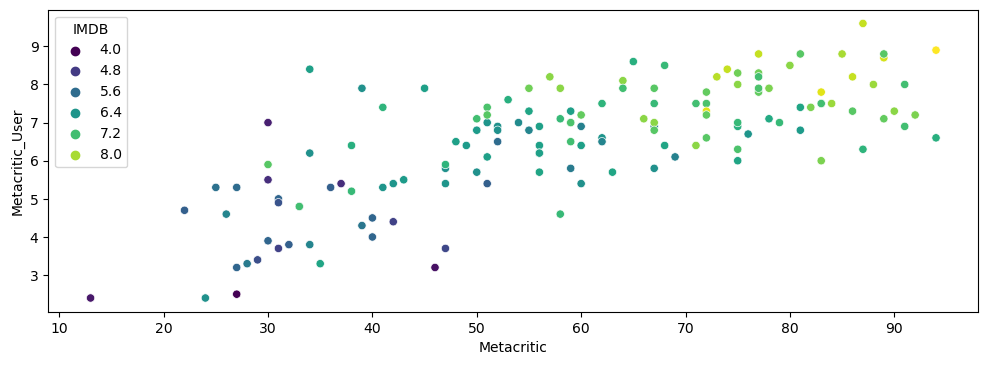

In [126]:
# Scatterplot showing distribution

plt.figure(dpi=100,figsize=(12,4))
sns.scatterplot(data=all_sites,x='Metacritic',y = 'Metacritic_User',palette='viridis',hue="IMDB")

## IMDB

Analysis of the IMDB critics reviews (ratings published by official critics) and user reviews. 

In [127]:
#column headers

all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'RottenTomatoes-RottenTomatoes_User'],
      dtype='object')

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

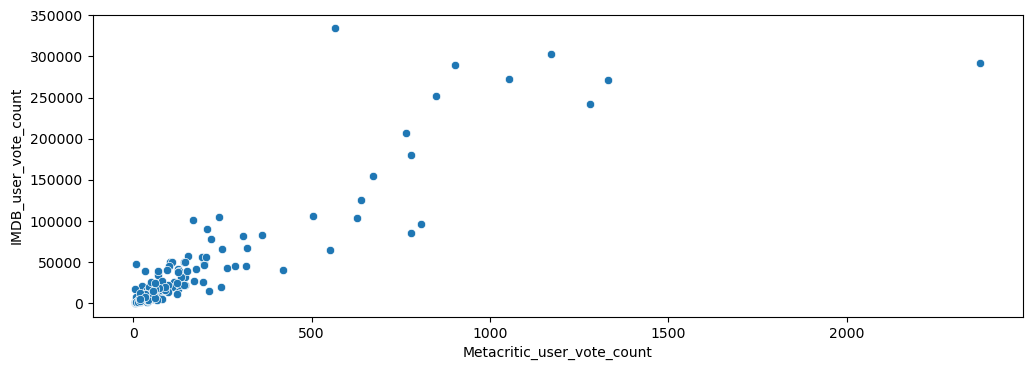

In [128]:
# Scatterplot showing distribution between MetaCritic and IMDB

plt.figure(dpi=100,figsize=(12,4))
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y = 'IMDB_user_vote_count',palette='viridis')

**Note above, there are a few outlier, but most points follow a linear pattern**

In [129]:
# Checking the name of the film that recevied the most IMDB votes

all_sites[all_sites['IMDB_user_vote_count']>310000]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes-RottenTomatoes_User
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [130]:
# Checking the name of the film that recevied the most MetaCritic votes**

all_sites.iloc[all_sites['Metacritic_user_vote_count'].idxmax()]

FILM                                  Mad Max: Fury Road (2015)
RottenTomatoes                                               97
RottenTomatoes_User                                          88
Metacritic                                                   89
Metacritic_User                                             8.7
IMDB                                                        8.3
Metacritic_user_vote_count                                 2375
IMDB_user_vote_count                                     292023
RottenTomatoes-RottenTomatoes_User                            9
Name: 88, dtype: object

## Fandago Scores vs. All Sites

Analysis on whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**Combine the Fandango Table with the All Sites table. We will join on inner as we only want to compare movies that are in both DataFrames**

In [131]:
pd.merge(newdf,all_sites,how='inner',on='FILM')

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes-RottenTomatoes_User
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,7.3,7.4,14,696,9


In [132]:
# Save merged dataframe to new dataframe

combined_df = pd.merge(newdf,all_sites,how='inner',on='FILM')

In [133]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   FILM                                145 non-null    object 
 1   STARS                               145 non-null    float64
 2   RATING                              145 non-null    float64
 3   VOTES                               145 non-null    int64  
 4   YEAR                                145 non-null    object 
 5   STARS_DIFF                          145 non-null    float64
 6   RottenTomatoes                      145 non-null    int64  
 7   RottenTomatoes_User                 145 non-null    int64  
 8   Metacritic                          145 non-null    int64  
 9   Metacritic_User                     145 non-null    float64
 10  IMDB                                145 non-null    float64
 11  Metacritic_user_vote_count          145 non-n

### Normalize merged column data to 0-5 to effectively compare like for like

RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango. 

In [134]:
# Normalize Method 1

combined_df['RottenTomatoes']/20

0      1.25
1      3.55
2      3.60
3      4.05
4      4.90
       ... 
140    4.35
141    4.75
142    4.65
143    4.75
144    3.00
Name: RottenTomatoes, Length: 145, dtype: float64

In [135]:
# Normalize Method 2

combined_df['RottenTomatoes'].apply(lambda x:x/20)

0      1.25
1      3.55
2      3.60
3      4.05
4      4.90
       ... 
140    4.35
141    4.75
142    4.65
143    4.75
144    3.00
Name: RottenTomatoes, Length: 145, dtype: float64

In [136]:
# Normalize Method 3

np.vectorize(lambda x:x/20)(combined_df['RottenTomatoes'])

array([1.25, 3.55, 3.6 , 4.05, 4.9 , 3.05, 3.75, 2.7 , 3.7 , 3.55, 4.25,
       4.  , 4.85, 2.5 , 2.55, 4.65, 3.1 , 4.25, 4.5 , 2.5 , 4.5 , 2.25,
       1.5 , 4.95, 1.35, 0.45, 1.35, 2.3 , 0.45, 1.3 , 1.45, 2.95, 2.5 ,
       2.85, 3.35, 3.9 , 1.6 , 4.6 , 1.3 , 4.9 , 0.85, 1.35, 1.5 , 4.6 ,
       1.75, 3.95, 2.7 , 2.95, 4.3 , 0.25, 0.5 , 1.55, 3.4 , 4.65, 0.4 ,
       1.55, 3.  , 2.6 , 0.95, 3.55, 4.35, 4.8 , 3.  , 0.8 , 3.1 , 1.95,
       1.7 , 0.9 , 2.75, 0.7 , 3.6 , 3.2 , 1.7 , 1.  , 4.35, 1.1 , 4.4 ,
       0.6 , 0.6 , 0.85, 3.65, 0.7 , 0.85, 0.65, 0.35, 4.95, 4.45, 0.55,
       0.55, 1.  , 4.2 , 4.85, 4.7 , 4.5 , 2.3 , 4.05, 2.25, 3.85, 2.45,
       2.6 , 4.15, 3.15, 1.3 , 4.9 , 4.7 , 4.8 , 2.1 , 4.8 , 4.1 , 0.65,
       4.85, 4.45, 4.05, 4.  , 4.6 , 4.85, 4.1 , 3.  , 2.7 , 4.8 , 2.  ,
       2.6 , 4.95, 4.95, 4.95, 4.2 , 4.95, 3.35, 5.  , 3.55, 1.3 , 4.8 ,
       4.2 , 0.9 , 2.6 , 4.45, 2.55, 4.85, 4.6 , 5.  , 4.35, 4.75, 4.65,
       4.75, 3.  ])

In [137]:
# Check if normalize methods give same answer

(np.vectorize(lambda x:x/20)(combined_df['RottenTomatoes']) != combined_df['RottenTomatoes'].apply(lambda x:x/20)).sum()

0

**Checking if npvectorize method is faster than dataframe slicing apply function**

In [138]:
%%timeit
combined_df[['RottenTomatoes','RottenTomatoes_User','Metacritic']].apply(lambda x:x/20)

1.65 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [139]:
%%timeit
np.vectorize(lambda x:x/20)(combined_df[['RottenTomatoes','RottenTomatoes_User','Metacritic']])

926 µs ± 65.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**As we can see, npvectorize is far faster!**

#### Normalize the ratings to all between 0 and 5

In [140]:
# Normalize that are over 100

combined_df[['RottenTomatoes','RottenTomatoes_User','Metacritic']] = \
            np.vectorize(lambda x:x/20)(combined_df[['RottenTomatoes','RottenTomatoes_User','Metacritic']])

In [141]:
# Normalize ratings that are over 10

combined_df[['Metacritic_User','IMDB']] = np.vectorize(lambda x:x/2)(combined_df[['Metacritic_User','IMDB']])

In [142]:
# Check Dataframe has been changed properly

combined_df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes-RottenTomatoes_User
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,1.25,2.10,2.30,1.60,2.10,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,3.55,4.05,2.95,3.50,3.65,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,3.60,4.25,3.60,3.30,3.70,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,4.05,4.20,3.35,3.40,3.70,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,4.90,4.50,4.70,4.45,4.30,807,96252,8


# 

**Creating a DataFrame that only contains the normalized ratings. Added both STARS and RATING from the original Fandango table.**

In [143]:
combined_df[['STARS','RATING','RottenTomatoes','RottenTomatoes_User','Metacritic','Metacritic_User','IMDB']]

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,4.5,4.5,4.90,4.50,4.70,4.45,4.30
...,...,...,...,...,...,...,...
140,3.5,3.5,4.35,3.15,3.40,3.20,3.35
141,4.0,3.6,4.75,4.05,4.35,3.15,3.50
142,4.5,4.2,4.65,4.20,3.35,3.50,3.90
143,4.0,3.9,4.75,4.30,4.30,3.65,3.70


In [144]:
norm_scores = combined_df[['STARS','RATING','RottenTomatoes','RottenTomatoes_User','Metacritic','Metacritic_User','IMDB']]

In [145]:
norm_scores.head()

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,4.5,4.5,4.90,4.50,4.70,4.45,4.30


# 

### Comparing Distribution of Scores Across Sites


**Plots comparing the distributions of normalized ratings across all sites.

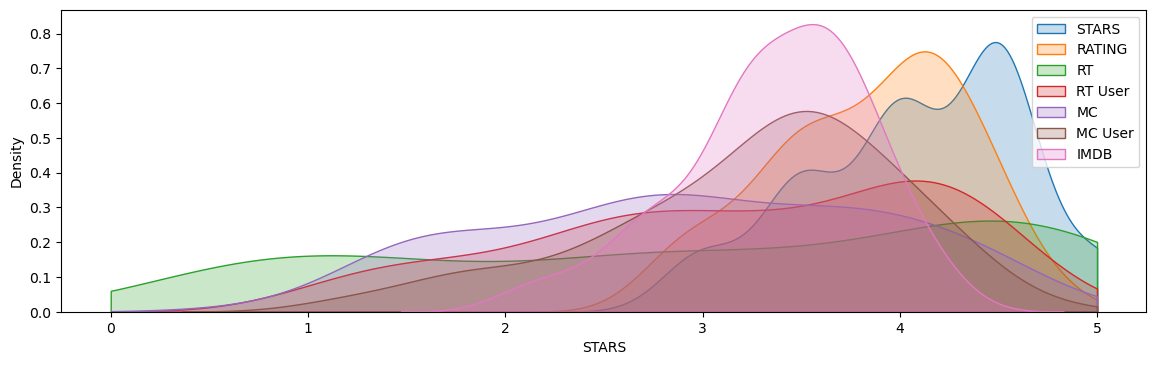

In [146]:
plt.figure(dpi=100,figsize=(14,4))

sns.kdeplot(data=norm_scores,x='STARS',palette='viridis',fill=True,label='STARS',clip=(0,5))
sns.kdeplot(data=norm_scores,x= 'RATING',palette='viridis',fill=True,label ='RATING',clip=(0,5))
sns.kdeplot(data=norm_scores,x='RottenTomatoes',palette='viridis',fill=True,label='RT',clip=(0,5))
sns.kdeplot(data=norm_scores,x= 'RottenTomatoes_User',palette='viridis',fill=True,label ='RT User',clip=(0,5))
sns.kdeplot(data=norm_scores,x='Metacritic',palette='viridis',fill=True,label='MC',clip=(0,5))
sns.kdeplot(data=norm_scores,x= 'Metacritic_User',palette='viridis',fill=True,label ='MC User',clip=(0,5))
sns.kdeplot(data=norm_scores,x= 'IMDB',palette='viridis',fill=True,label ='IMDB',clip=(0,5))


plt.legend()

**Clearly Fandango (STARS and RATING) has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**Comparing the distribution of RT critic ratings against the STARS displayed by Fandango.**

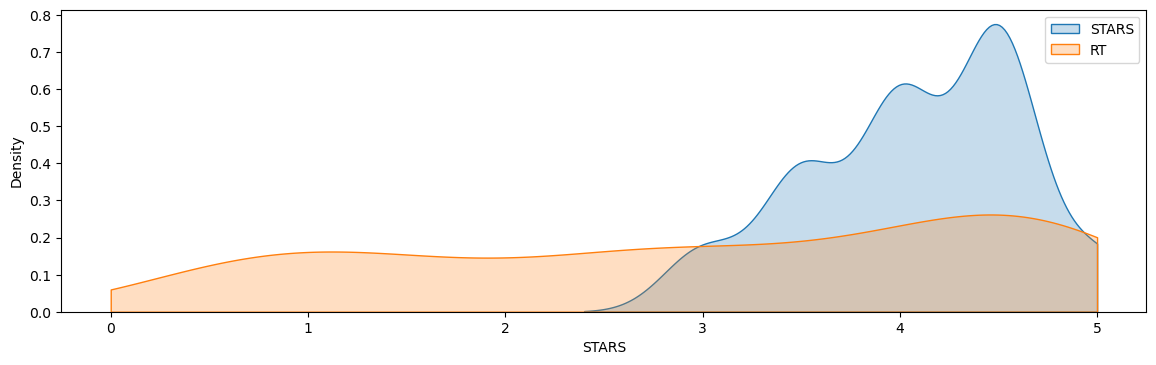

In [147]:
plt.figure(dpi=100,figsize=(14,4))

sns.kdeplot(data=norm_scores,x='STARS',palette='viridis',fill=True,label='STARS',clip=(0,5))
sns.kdeplot(data=norm_scores,x='RottenTomatoes',palette='viridis',fill=True,label='RT',clip=(0,5))

plt.legend()

**It is very obviosu to see that the Fandango(STARS) ratings are quite higher than normal.
In addition, they show an extreme skew to the right, with a majority of their scores centered between 4 and 5**

**Histplot comparing all normalized scores.**

<AxesSubplot:ylabel='Count'>

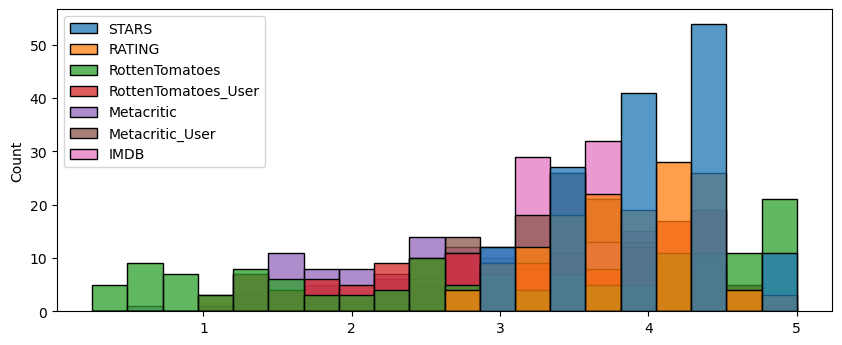

In [149]:
plt.figure(dpi=100,figsize=(10,4))
sns.histplot(data=norm_scores)



### How the worst movies rated across all platforms

**Using a clustermap visualization of all normalized scores to show clusters of poorly rated movies.**

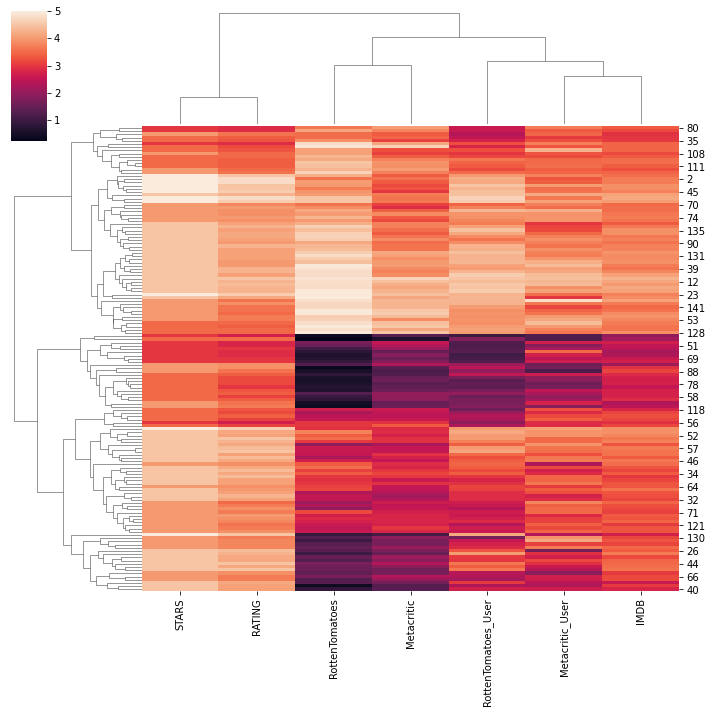

In [162]:
sns.clustermap(data=norm_scores)

**The top 10 lowest rated movie scores by Rotten Tomatoes Critic Ratings**

In [163]:
norm_scores.sort_values('RottenTomatoes')[:10]

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
49,3.5,3.5,0.25,1.80,0.65,1.20,2.15
84,4.0,3.9,0.35,2.45,1.40,1.65,2.95
54,4.0,3.7,0.40,1.85,1.55,1.85,2.45
25,4.5,4.1,0.45,2.30,1.30,2.30,3.05
28,3.0,2.7,0.45,1.00,1.35,1.25,2.00
50,4.0,3.6,0.50,1.75,1.50,2.75,2.30
88,4.0,3.6,0.55,2.00,1.20,1.20,3.15
87,3.5,3.2,0.55,1.35,1.60,1.90,2.70
78,3.5,3.2,0.60,1.50,1.35,1.60,2.75
77,3.5,3.2,0.60,1.75,1.50,1.95,2.75


In [165]:
# Sum worst scores across all review types
# It is obvious Fandango ratings are quite high (STARS and RATING)

norm_scores.sort_values('RottenTomatoes')[:10].sum()

STARS                  37.50
RATING                 34.70
RottenTomatoes          4.70
RottenTomatoes_User    17.75
Metacritic             13.40
Metacritic_User        17.65
IMDB                   26.25
dtype: float64

In [169]:
# Saving to a dataframe

worst_ten = norm_scores.sort_values('RottenTomatoes')[:10]

**Visualizing the distribution of ratings across all sites for the top 10 worst movies.**

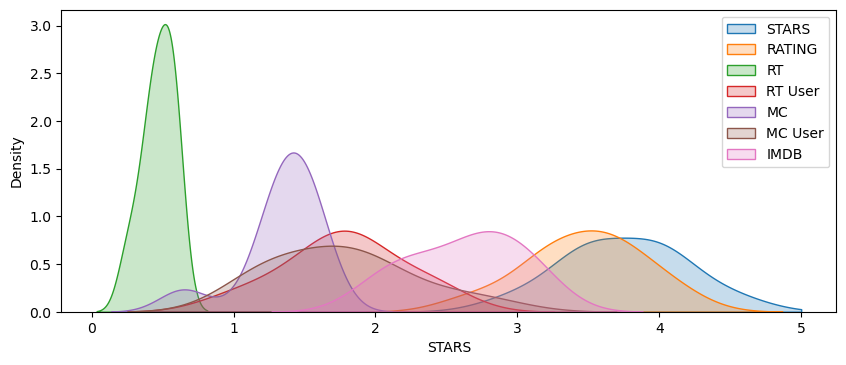

In [170]:
plt.figure(dpi=100,figsize=(10,4))

sns.kdeplot(data=worst_ten,x='STARS',palette='viridis',fill=True,label='STARS',clip=(0,5))
sns.kdeplot(data=worst_ten,x= 'RATING',palette='viridis',fill=True,label ='RATING',clip=(0,5))
sns.kdeplot(data=worst_ten,x='RottenTomatoes',palette='viridis',fill=True,label='RT',clip=(0,5))
sns.kdeplot(data=worst_ten,x= 'RottenTomatoes_User',palette='viridis',fill=True,label ='RT User',clip=(0,5))
sns.kdeplot(data=worst_ten,x='Metacritic',palette='viridis',fill=True,label='MC',clip=(0,5))
sns.kdeplot(data=worst_ten,x= 'Metacritic_User',palette='viridis',fill=True,label ='MC User',clip=(0,5))
sns.kdeplot(data=worst_ten,x= 'IMDB',palette='viridis',fill=True,label ='IMDB',clip=(0,5))

plt.legend()

In [172]:
# TRIVIA: Rating of worst movie on Fandango is almost twice of any other rating!

worst_ten.sort_values('STARS',ascending=False)[:1]

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
25,4.5,4.1,0.45,2.3,1.3,2.3,3.05


---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**TRIVIA: Rating of worst movie on Fandango is almost twice of any other rating!, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

----